In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img1 = cv2.imread('dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

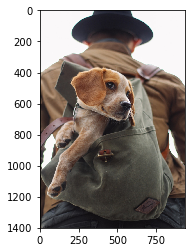

In [3]:
plt.imshow(img1)

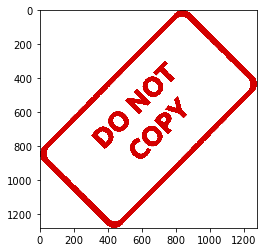

In [4]:
plt.imshow(img2)

In [5]:
img1.shape

(1401, 934, 3)

In [6]:
img2.shape

(1280, 1277, 3)

In [7]:
# BLENDING IMAGES OF SAME SIZE
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))

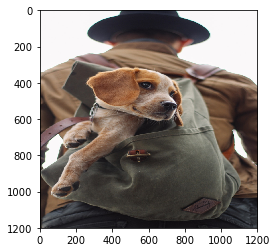

In [8]:
plt.imshow(img1)

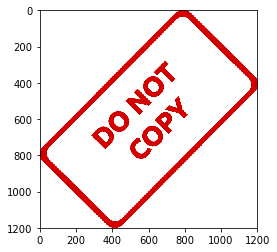

In [9]:
plt.imshow(img2)

In [10]:
blended = cv2.addWeighted(src1=img1,alpha=0.5,src2=img2,beta=0.5,gamma=0)

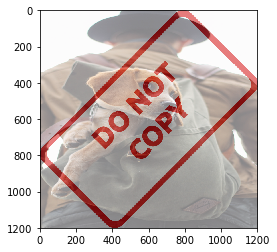

In [11]:
plt.imshow(blended)

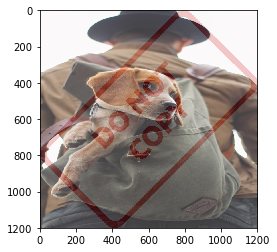

In [12]:
blended = cv2.addWeighted(src1=img1,alpha=0.8,src2=img2,beta=0.2,gamma=0)
plt.imshow(blended)

In [13]:
# OVERLAY A SMALL IMAGE ON TOP OF A LARGER IMAGE (NO BLENDING)
# numpy reassignment

In [14]:
img1 = cv2.imread('dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

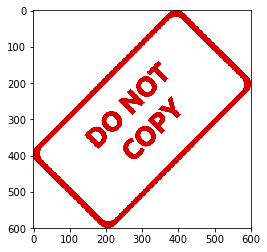

In [15]:
img2 = cv2.resize(img2,(600,600))
plt.imshow(img2)

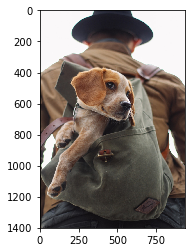

In [16]:
plt.imshow(img1)

In [17]:
large_img = img1.copy()
small_img = img2.copy()

In [18]:
x_offset = 0 
y_offset = 0

In [19]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [20]:
large_img[y_offset:y_end,x_offset:x_end] = small_img

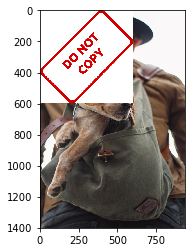

In [21]:
plt.imshow(large_img)

In [22]:
# BLEND TOGETHER IMAGES OF DIFFERENT SIZES

In [23]:
img1 = cv2.imread('dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

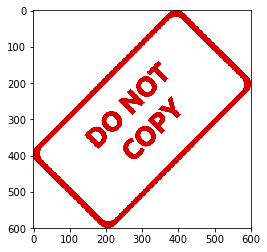

In [24]:
img2 = cv2.resize(img2,(600,600))
plt.imshow(img2)

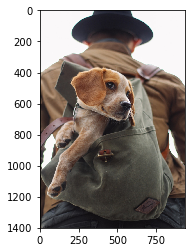

In [25]:
plt.imshow(img1)

In [26]:
img1.shape

(1401, 934, 3)

In [27]:
x_offset = 934 - 600
y_offset = 1401 - 600

In [28]:
img2.shape

(600, 600, 3)

In [29]:
rows,cols,channels = img2.shape

In [30]:
roi = img1[y_offset:1401,x_offset:934]

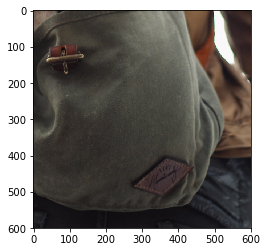

In [31]:
plt.imshow(roi)

In [32]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)

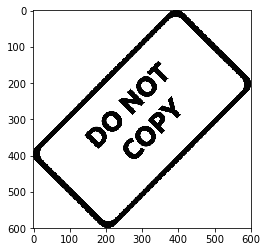

In [33]:
plt.imshow(img2gray,cmap='gray')

In [34]:
mask_inv = cv2.bitwise_not(img2gray)

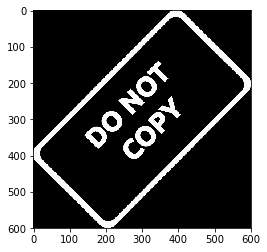

In [35]:
plt.imshow(mask_inv,cmap='gray')

In [36]:
mask_inv.shape # no color channel

(600, 600)

In [38]:
white_background = np.full(img2.shape,255,dtype=np.uint8)

In [39]:
white_background.shape

(600, 600, 3)

In [40]:
bk = cv2.bitwise_or(white_background,white_background,mask=mask_inv)

In [41]:
bk.shape # 3 channels

(600, 600, 3)

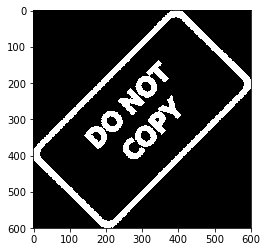

In [42]:
plt.imshow(bk)

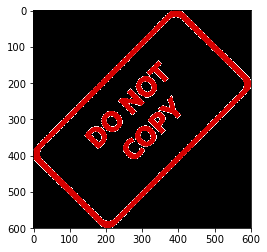

In [43]:
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)
plt.imshow(fg)

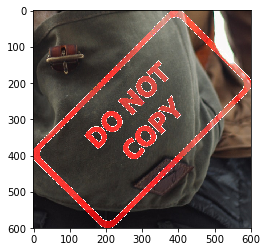

In [45]:
final_roi = cv2.bitwise_or(roi,fg)
plt.imshow(final_roi)

In [46]:
large_img = img1.copy()
small_img = final_roi.copy()

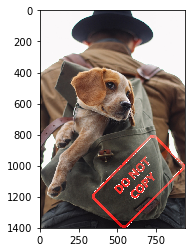

In [47]:
large_img[y_offset:y_offset + small_img.shape[0],x_offset:x_offset + small_img.shape[1]] = small_img
plt.imshow(large_img)